# TKT4196 - Aspects of Structural Safety
## P00-Introduction to Python
__Jorge Mendoza, 2020__

This lecture aims to provide the student with a basic introduction to Python pogramming. Nevertheless, this is just a ''starter-pack'' and the student must develop confidence in the use of Python up to a certain degree of proficiency by practicing on her own. When the student faces issues, it should first resort to Python-dedicated forums. Most likely, somebody has had and shared the same questions and issues that you encounter. It is also recommended to skim through the handbook: *H. P. Langtangen (2016) A Primer on Scientific Programming with Python (Fifth Edition)*

We will use Spyder to write and run code. Spyder is an integrated development environment (IDE) specifically developed for scientific programming.

### Console

The spyder console is used to run commands. The __global variables__ in use are collected in the *variable explorer*. Global variables, as opposed to __local variables__ are accessible from the terminal as well as from scripts. This is an important feature to bear in mind and it will be further elaborated later on. 

#### Modules in Python
Python gets access to a number of bult-in functions. We often need to use additional modules, which can be used with the command *import*. E.g:

In [1]:
import numpy as np

This makes all functions of numpy available under the name np. If you want to see which functions or methods are available within a module, this is stored in a variable called __all__. E.g., for the module we have just imported, you can type:

In [2]:
# np.__all__

To acess the documentation of a certain function, use the function help():

In [3]:
# help(np.array)

In [4]:
# print(np.array.__doc__)

Most of the modules that we will be using can be seen in the file tktreq.txt

#### Value assignment and data structures
Assigning a value to a variable is done using the symbol =. Variables can be different types of data structures, e.g.: scalars, strings, lists, numerical arrays, tuples, dictionaries...

* scalars:

In [5]:
a = 1     # integer; same as a = int(1)
b = 1.2   # float

* strings:

In [6]:
a_string = "Hello, world!"
print(a_string)

Hello, world!


* lists: 

In [7]:
a_list = []       # Empty list
b_list = [1,2,4]  # List with three numerical items
c_list = [1,[1,2],'Hola']
print(c_list)

[1, [1, 2], 'Hola']


* numerical arrays:

In [8]:
import numpy as np
a_array = np.array([1,2,3])    # a vector

In [9]:
b_array = np.array([[1,2,3],[2,3,1]])    # a matrix
print(b_array)

[[1 2 3]
 [2 3 1]]


In [10]:
b_array.shape                  # dimension of matrix

(2, 3)

* tuples: (immutable sequences)

In [11]:
a_tuple = (1, 2, 3)

* dictionaries:

In [12]:
a_dict = {}
a_dict['name'] = 'TKT'
a_dict['number'] = 4196
print(a_dict)

{'name': 'TKT', 'number': 4196}


### Probability functions
In this course we will use some built-in statistical distributions. They will be explained in more detail as we move forward with the course. Statistical functions can be imported from scipy.stats module. Here, an example of the most used one is shown, i.e. the Normal distribution: 

In [13]:
import scipy.stats as sps
sps.norm.pdf(0,5,2)      # normal density function with mean 5 and standard deviation 2.

0.00876415024678427

In [14]:
sps.norm.cdf(0,5,2)      # normal cumulative distribution function with mean 5 and standard deviation 2.

0.006209665325776132

In [15]:
sps.norm.ppf(0.1,5,2)    # inverse normal distribution with mean 5 and standard deviation 2.

2.4368968689107993

In [16]:
np.random.normal(0,1,10) # 10 random samples from standard normal distribution

array([-0.2711595 , -0.44407798, -1.90913952,  0.50398924, -0.73262264,
        0.94115865,  0.17125752, -0.2648018 , -0.20827972, -1.19530194])

Can you guess the output of sps.norm.ppf(sps.norm.cdf(4,5,2),5,2) produce without running it?

Other distributions are present in Matlab: pdf('name',param) function can be used, although it is not optimized. It is recommended to use the specific functions.

### Plotting
We use the module matplotlib to generate plots.

In [17]:
import matplotlib.pyplot as plt

#### plt.plot function

* __Example 1:__ plot sinus function from 0 to 2*pi radians

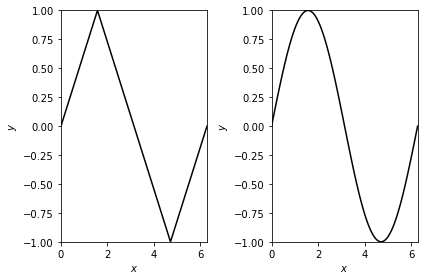

In [18]:
fig,ax=plt.subplots(1,2)
# Subplot 1: coarse discretization
x1 = np.linspace(0,2*np.pi,5)    # vector that goes from 0 to 2pi in steps of pi/2 rads. Same as x1 = np.arange(0,2*np.pi+np.pi/2,np.pi/2) 
y1 = np.sin(x1)
ax[0].plot(x1,y1,'k')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$');
ax[0].set_xlim(0,2*np.pi)
ax[0].set_ylim(-1,1)
# Subplot 2: fine discretization
x2 = np.linspace(0,2*np.pi,101)  # vector that goes from 0 to 2pi in steps of pi/50 rads
y2 = np.sin(x2)
ax[1].plot(x2,y2,'k')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$');
ax[1].set_xlim(0,2*np.pi)
ax[1].set_ylim(-1,1)
plt.tight_layout()               # fit size of subplots to window

* __Example 2:__ Histogram of the standard normal distribution

(-5.0, 5.0)

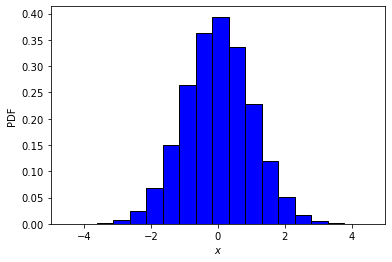

In [19]:
fig2,ax = plt.subplots(1,1)
pmf = np.random.randn(int(1e6))      # generate 1e4 normal distributed random numbers
kwargs = dict(bins=20, density=True, color='blue',edgecolor='black', stacked=True)
ax.hist(pmf,**kwargs)
ax.set_xlabel('$x$')
ax.set_ylabel('PDF');
ax.set_xlim(-5,5)

Now try to plot the *continuous* probability density function as introduced above and plot it over the bar plot

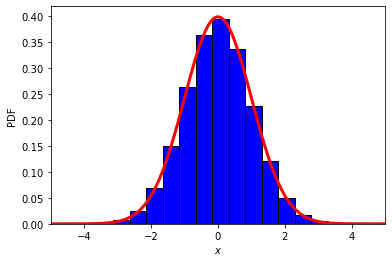

In [20]:
from IPython import display
x2 = np.linspace(-5,5,101)
ax.plot(x2,sps.norm.pdf(x2),'r',LineWidth=3)
display.display(fig2)

#### 3D-plots (plt.contour and plt.surface)

* __Surface:__ Plotting the bivariate standard normal distribution

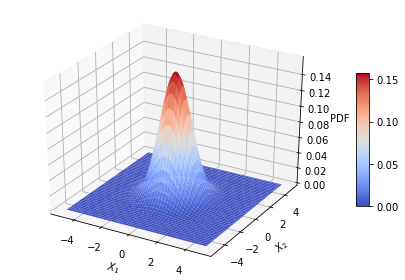

In [21]:
from matplotlib import cm
X = np.linspace(-5,5,100)
X1, X2 = np.meshgrid(X,X)
pos = np.dstack((X1, X2))   # pairs of [X1,X2]
MU = [0, 0]
C = [[1, 0], [0, 1]]
fxx = sps.multivariate_normal(MU, C)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X1, X2, fxx.pdf(pos),cmap=cm.coolwarm)
# Enhance the plot
fig.colorbar(surf, shrink=0.5, aspect=10);
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.set_zlabel('PDF')
plt.tight_layout()

* __Contour__: Same using contour plots

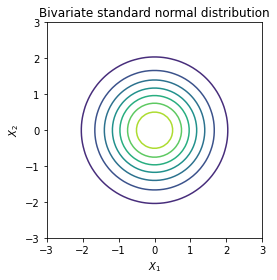

In [22]:
fig, ax1 = plt.subplots(1, 1)
ax1.contour(X1, X2, fxx.pdf(pos))   # another option is contourf to add colour
# Enhance the plot
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.set_aspect('equal')
ax1.set_title('Bivariate standard normal distribution')
plt.tight_layout()

### Conditionals (if statements) and loops

#### for loops

for loops are used to compute repetitive task. For example, 

In [23]:
f = 1
for i in range(1,10):
    f*=i
print(f)

362880


#### while loops

while loops are to some extent similar to for loops and many tasks can be done using either of them. While loops are different in the sense that the repetitive task will be performed until a condition is reached.

In [24]:
f = 1
i=1
while i <11:
    f*=i
    i+=1
print(f)

3628800


In [25]:
import random
count = 0
NoS = 100
for i in range(0,NoS):
    dice_roll = random.randint(1,6)
    if dice_roll == 6:
        count += 1;
sol = count/NoS
error = abs(sol-1/6)/(1/6)
print("a = {a:.2f}% the die rolled a 6\n".format(a=sol*100))
print("Hence, the error associated with {n:g} simulations is {e:.2f}%\n".format(n=NoS,e=error*100))

a = 17.00% the die rolled a 6

Hence, the error associated with 100 simulations is 2.00%



Estimate, using a while loop, how many simulations are needed to achieve ca. 0.1% accuracy

In [26]:
NoS = 100
tol = 0.1/100
error = tol+1
while error>tol:
    count = 0
    for i in range(0,NoS):
        dice_roll = random.randint(1,6)
        if dice_roll == 6:
            count += 1;
    sol = count/NoS
    error = abs(sol-1/6)/(1/6)
    print("The error associated with {n:e} simulations is {e:.2f}%\r".format(n=NoS,e=error*100))
    NoS*=10
print("{n:g} simulations are needed to achieve the desired accuracy\n".format(n=NoS/10))

The error associated with 1.000000e+02 simulations is 16.00%
The error associated with 1.000000e+03 simulations is 4.60%
The error associated with 1.000000e+04 simulations is 4.78%
The error associated with 1.000000e+05 simulations is 0.03%
100000 simulations are needed to achieve the desired accuracy



### Functions

We have been using so far several built-in functions. They are used to automatize a process, which can be called when needed.  

An important characteristic of functions is that it uses local variables. This means that it does not have access to the *Variable explorer* in the main session. To use variables of the main session we need to input them into function.

#### Creating our own functions

Let's exemplify how to create a function by creating one that performs the above task of generating n rolls of a dice

In [249]:
def dicerolls(n):
    """ This function inputs an integer number n and generate n dice rolls"""
    n = int(n)   # we make sure that the number is an integer
    dice_rolls = []
    for i in range(0,n):
        dice_rolls.append(random.randint(1,6))
    return dice_rolls

Note that the text at the beginning is what will be output when we call help() on the function

In [250]:
help(dicerolls)

Help on function dicerolls in module __main__:

dicerolls(n)
    This function inputs an integer number n and generate n dice rolls



In [251]:
print(dicerolls(10))

[2, 5, 2, 5, 5, 6, 5, 2, 5, 4]


Let's use this function to create another one that uses M different dice

In [252]:
def Mdice(M,n):
    """ This function rolls M dice n times"""
    M = int(M)
    n = int(n)
    dices_rolls = np.zeros((M,n))
    for j in range(0,M):
            dices_rolls[j] = dicerolls(n)
    return dices_rolls

In [253]:
Mdice(2,10)

array([[3., 2., 4., 5., 5., 1., 2., 5., 1., 4.],
       [4., 6., 4., 3., 4., 1., 1., 6., 1., 5.]])

Use this function to calculate what is the probability of getting two sixs by using 2 dices

In [259]:
NoS = 1e4
rolls = Mdice(2,NoS)
boolean = np.all(rolls ==6,axis=0)
res = sum(boolean)/NoS
exact = 1/36
error = abs(res-exact)/exact
print("The error associated with {n:e} simulations is {e:.2f}%\r".format(n=NoS,e=error*100))

The error associated with 1.000000e+04 simulations is 0.44%


#### Lambda functions

When functions are simple input output relations, they sometimes can be simply defined in one line using functions handles:

In [266]:
f = lambda x: (x+1)**2 + 2*x   # a value f is given using the provided formula by inputting x 
print(f(2))

13


#### Some useful functions

A type of function that we will often use are solvers. Let's try to find the zero of the function f(x)=(x+1)**2 + 2*x

In [300]:
import scipy as sp
x0 = 1.  # Initial guess (sometimes very important but always required)
f_zero = sp.optimize.fsolve(f,x0)[0]
print("f({x:.3f}) = 0\r".format(x=f_zero))

f(-0.268) = 0


and its minimum

In [301]:
solmin = sp.optimize.minimize(f,x0,method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
f_min = float(solmin.fun)
x_min = float(solmin.x)
print("minima is f({x:.3f}) = {fm:.3f}\r".format(x=x_min,fm=f_min))

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 34
         Function evaluations: 69
minima is f(-2.000) = -3.000


Text(0, 0.5, '$f(x)$')

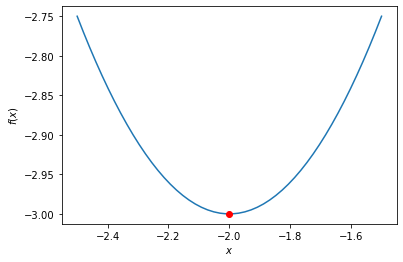

In [308]:
fig,ax=plt.subplots()
xarray = np.linspace(x_min-0.5,x_min+0.5)
ax.plot(xarray,f(xarray))
ax.plot(x_min,f_min,'or')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

Integrate the previous function from -10 to 10

In [ ]:
f_int,int_err = sp.integrate.quad(f,-10,10)

Integrate the bivariate normal distribution:

In [326]:
fx = lambda x,y: fxx.pdf([x,y])
sp.integrate.nquad(fx,[[-5,5],[-5,5]])

(0.9999988533940414, 8.668315509829938e-10)